In [1]:
"""
------------------------------------------------------------------------------
About

Script to check if there is new registered data on christmas markets in Berlin. 
The new data is saved as new_data.csv
------------------------------------------------------------------------------
"""



'\n------------------------------------------------------------------------------\nAbout\n\nScript to check if there is new registered data on christmas markets in Berlin. \nThe new data is saved as new_data.csv\n------------------------------------------------------------------------------\n'

In [2]:
"""
------------------------------------------------------------------------------
Libraries
------------------------------------------------------------------------------
"""

import requests
import pandas as pd
import geopandas as gpd

from shapely.geometry import Point

import time

import re
from datetime import datetime
import sys

In [3]:
#import data
old_data = pd.read_csv("../public/markets.csv") #current markets

old_data.head()

,id,name,shortname,strasse,bezirk,plz_ort,von,bis,oeffnungszeiten,Mo,...,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,train,image,urheberschaft
0,183,Smash Burger,Smash Burger,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,Berlin,01.11.24,28.12.24,14:00 Uhr bis 23:00 Uhr,14:00-23:00,...,13.4086,1,0,0,0,0,1,"U Klosterstr. (Berlin), U Rotes Rathaus (Berli...",placeholder.png,"freestocks.org, CC BY-SA 4.0 via Wikimedia Com..."
1,60,Winterzauber Weihnachtsmarkt,Winterzauber Weihnachtsmarkt,Möllhausenufer 30,Treptow-Köpenick,12555 Berlin,01.11.24,31.12.24,12:00 - 20:00 Uhr,12:00-20:00,...,13.6002,0,0,0,0,0,0,NaN,Winterzauber_im_Advent.jpg,Copyright: Kira Hofmann
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163 Berlin,01.12.24,22.12.2024,11:00 - 18:00 Uhr,0,...,13.2327,0,0,0,0,0,1,S Mexikoplatz (Berlin),Mexikoplatz_Weihnachtsmarkt.jpg,"Colin Smith, CC BY-SA 2.0 via Wikimedia Commons"
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163 Berlin,08.12.24,08.12.24,11:00 - 18:00 Uhr,0,...,13.2327,1,0,0,0,0,1,S Mexikoplatz (Berlin),Mexikoplatz_Weihnachtsmarkt.jpg,"Colin Smith, CC BY-SA 2.0 via Wikimedia Commons"
4,102,Adventsökomarkt der Grünen Liga,Adventsökomarkt der Grünen Liga,Wörtherstraße am Kollwitzplatz - zwischen Knaa...,Pankow,10405 Berlin,01.12.24,22.12.24,12:00 - 19:00 Uhr,0,...,13.4175,0,0,0,0,0,0,NaN,placeholder.png,"freestocks.org, CC BY-SA 4.0 via Wikimedia Com..."


In [4]:
"""
------------------------------------------------------------------------------
Function
- fetch data from url
------------------------------------------------------------------------------
"""

def fetch_data(url):
    try:
        response = requests.get(url)
        response.raise_for_status() 
        data = response.json()  #convert to json
        return data
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None


In [5]:
#Xmas Data
url = "https://www.berlin.de/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/index/all.geojson?q="

xmasData = fetch_data(url)
print(xmasData)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [13.4086, 52.5191]}, 'properties': {'title': '183', 'href': '/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/183', 'description': '52,5191<br>13,4086<br> <a href="/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/183">Mehr...</a>', 'id': '/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/183', 'data': {'id': 183, 'bezirk': 'Mitte', 'name': 'Smash Burger', 'strasse': 'Landsberger Allee, Rotes Rathaus, Alexander Platz', 'plz': '', 'von': '01.11.2024', 'bis': '28.12.2024', 'veranstalter': 'Mr. Smash Burger', 'oeffnungszeiten': '14:00 Uhr bis 23:00 Uhr', 'email': 'vivien-selimi@gmx.de', 'w3': '/', 'bemerkungen': '/'}}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [13.6002, 52.4152]}, 'properties': {'title': '60', 'href': '/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/60', 'description': '52,415

In [6]:
list = []

for feature in xmasData["features"]:
    #data
    data = feature["properties"]["data"]

    #geometry
    coordinates = feature["geometry"]["coordinates"]

    #add coordinates to data
    data["lng"] = coordinates[0]
    data["lat"] = coordinates[1]


    list.append(data)

new_data = pd.DataFrame(list)


pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

new_data.head()

,id,bezirk,name,strasse,plz,von,bis,veranstalter,oeffnungszeiten,email,w3,bemerkungen,lng,lat
0,183,Mitte,Smash Burger,"Landsberger Allee, Rotes Rathaus, Alexander Platz",,01.11.2024,28.12.2024,Mr. Smash Burger,14:00 Uhr bis 23:00 Uhr,vivien-selimi@gmx.de,/,/,13.4086,52.5191
1,60,Treptow-Köpenick,Winterzauber Weihnachtsmarkt,Möllhausenufer 30,12555,01.11.2024,31.12.2024,Strandbad Wendenschloss GmbH,12:00 - 20:00 Uhr,info@strandbad-wendenschloss.berlin,https://strandbad-wendenschloss.berlin,/,13.6002,52.4152
2,63,Steglitz-Zehlendorf,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,Mexikoplatz und Bülowstraße 1-8,14163,01.12. / 15.12. / 22.12.2024,,KUNSTHAND-BERLIN Cornelja Hasler,11:00 - 18:00 Uhr,info@kunsthand-berlin.de,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",13.2327,52.4370
3,66,Steglitz-Zehlendorf,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,Mexikoplatz und Bülowstraße 1-8,14163,08.12.2024,08.12.2024,KUNSTHAND-BERLIN Cornelja Hasler,11:00 - 18:00 Uhr,info@kunsthand-berlin.de,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",13.2327,52.4370
4,195,Charlottenburg-Wilmersdorf,Kunsthandwerklicher ADVENT am Karl-August-Platz,Karl-August-Platz,10625,01.12.2024,,Family & Friends e. V.,11:00 Uhr bis 18:00 Uhr,stadtkultur@family-and-friends-ev.de,https://www.family-and-friends-ev.de/kunsthandwerklicher-advent-am-1-und-8-dezember-2024,,13.3101,52.5083


In [7]:
print(type(new_data))

<class 'pandas.core.frame.DataFrame'>


In [8]:
print(type(old_data))

<class 'pandas.core.frame.DataFrame'>


In [9]:
"""
------------------------------------------------------------------------------
Compare old_data with new_data
------------------------------------------------------------------------------
"""


if len(old_data) > 0: 
    #identify existing data by id
    new_data = new_data[~new_data["id"].isin(old_data["id"])]

if len(new_data) > 0: 
    new_data.to_csv("new_Data.csv", index=False)

    #load new data
    loaded_data = pd.read_csv("new_Data.csv")
    print(loaded_data)
else:
    print("Keine neuen Daten.")
    sys.exit() #stop script


    id                      bezirk  \
0  195  Charlottenburg-Wilmersdorf   
1  198  Charlottenburg-Wilmersdorf   
2  192                 Brandenburg   

                                                                                name  \
0                                    Kunsthandwerklicher ADVENT am Karl-August-Platz   
1                                 Kunsthandwerklicher ADVENT in der Leonhardtstrasse   
2  Liebenberger Weihnachtsmarkt 2024 I Weihnachtszauber auf Schloss & Gut Liebenberg   

                         strasse    plz         von         bis  \
0              Karl-August-Platz  10625  01.12.2024         NaN   
1                Leonhardtstraße  14057  08.12.2024         NaN   
2  Parkweg 1a (Löwenberger Land)  16775  30.11.2024  22.12.2024   

                              veranstalter  \
0                   Family & Friends e. V.   
1                   Family & Friends e. V.   
2  DKB STIFTUNG I Schloss & Gut Liebenberg   

                                        

In [10]:
len(new_data)

3

In [11]:
#add new empty columns "shortname", "plz_ort", "train", "von", "bis", "Mo", "Di", "Mi", "Do", "Fr", "Sa", "So", "closed-exc", "hours-exc", "ignore", "immer-kostenlos", "international", "barrierefrei", "action", "short_distance"

loaded_data["shortname"] = None
loaded_data["plz_ort"] = None
loaded_data["Mo"] = None
loaded_data["Di"] = None
loaded_data["Mi"] = None
loaded_data["Do"] = None
loaded_data["Fr"] = None
loaded_data["Sa"] = None
loaded_data["So"] = None
loaded_data["closed-exc"] = None
loaded_data["hours-exc"] = None
loaded_data["ignore"] = 0
loaded_data["immer-kostenlos"] = 0
loaded_data["international"] = 0
loaded_data["barrierefrei"] = 0
loaded_data["action"] = 0
loaded_data["short_distance"] = 0
loaded_data["bemerkungen_en"] = None

#new order of data frame columns
loaded_data = loaded_data[["id","name", "shortname", "strasse", "bezirk", "plz", "plz_ort", "von", "bis", "oeffnungszeiten", "Mo", "Di", "Mi", "Do", "Fr", "Sa", "So", "closed-exc", "hours-exc", "w3", "bemerkungen", "bemerkungen_en", "lat", "lng", "ignore", "immer-kostenlos", "international", "barrierefrei", "action", "short_distance"]]

loaded_data.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance
0,195,Kunsthandwerklicher ADVENT am Karl-August-Platz,None,Karl-August-Platz,Charlottenburg-Wilmersdorf,10625,None,01.12.2024,NaN,11:00 Uhr bis 18:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.family-and-friends-ev.de/kunsthandwerklicher-advent-am-1-und-8-dezember-2024,NaN,None,52.5083,13.3101,0,0,0,0,0,0
1,198,Kunsthandwerklicher ADVENT in der Leonhardtstrasse,None,Leonhardtstraße,Charlottenburg-Wilmersdorf,14057,None,08.12.2024,NaN,11:00 Uhr bis 18:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.family-and-friends-ev.de/8-dezember-kunsthandwerklicher-advent-in-der-leonhardtstrasse,NaN,None,52.5053,13.2970,0,0,0,0,0,0
2,192,Liebenberger Weihnachtsmarkt 2024 I Weihnachtszauber auf Schloss & Gut Liebenberg,None,Parkweg 1a (Löwenberger Land),Brandenburg,16775,None,30.11.2024,22.12.2024,Freitags: 17:00 Uhr bis 20:00 Uhr\nSamstags und Sonntags: 12:00 Uhr bis 19:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.schloss-liebenberg.de/liebenberger-weihnachtsmarkt/,"Eintauchen in festlichen Lichterglanz vor einzigartiger, historischer Kulisse.",None,52.8950,13.2592,0,0,0,0,0,0


In [12]:
#column "ort"
loaded_data["bezirk"].unique()

list_bez = ['Mitte', 'Treptow-Köpenick', 'Steglitz-Zehlendorf', 'Pankow',
       'Spandau', 'Reinickendorf', 'Tempelhof-Schöneberg',
       'Marzahn-Hellersdorf', 'Charlottenburg-Wilmersdorf', 'Potsdam',
       'Friedrichshain-Kreuzberg', 'Neukölln']

loaded_data["ort"] = "Berlin"

loaded_data.loc[~loaded_data["bezirk"].isin(list_bez), "ort"] = None

In [13]:
#combined column "plz_ort" as str
loaded_data["plz_ort"] = loaded_data["plz"].astype(str) + " " + loaded_data["ort"]
loaded_data["plz_ort"].astype(str)

loaded_data.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,195,Kunsthandwerklicher ADVENT am Karl-August-Platz,None,Karl-August-Platz,Charlottenburg-Wilmersdorf,10625,10625 Berlin,01.12.2024,NaN,11:00 Uhr bis 18:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.family-and-friends-ev.de/kunsthandwerklicher-advent-am-1-und-8-dezember-2024,NaN,None,52.5083,13.3101,0,0,0,0,0,0,Berlin
1,198,Kunsthandwerklicher ADVENT in der Leonhardtstrasse,None,Leonhardtstraße,Charlottenburg-Wilmersdorf,14057,14057 Berlin,08.12.2024,NaN,11:00 Uhr bis 18:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.family-and-friends-ev.de/8-dezember-kunsthandwerklicher-advent-in-der-leonhardtstrasse,NaN,None,52.5053,13.2970,0,0,0,0,0,0,Berlin
2,192,Liebenberger Weihnachtsmarkt 2024 I Weihnachtszauber auf Schloss & Gut Liebenberg,None,Parkweg 1a (Löwenberger Land),Brandenburg,16775,NaN,30.11.2024,22.12.2024,Freitags: 17:00 Uhr bis 20:00 Uhr\nSamstags und Sonntags: 12:00 Uhr bis 19:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.schloss-liebenberg.de/liebenberger-weihnachtsmarkt/,"Eintauchen in festlichen Lichterglanz vor einzigartiger, historischer Kulisse.",None,52.8950,13.2592,0,0,0,0,0,0,None


In [14]:
"""
------------------------------------------------------------------------------
date time
------------------------------------------------------------------------------
"""

def convert_to_datetime(date_str):
    try:
        #convert in datetime if possible
        date = pd.to_datetime(date_str, format="%d.%m.%Y", dayfirst=True, errors="raise")
        return date
    except (ValueError, TypeError):
        #if error occurs keep original date str
        print(f"Error in conversion: {date_str}") 
        return date_str

#convert to datetime
loaded_data["von"] = loaded_data["von"].apply(convert_to_datetime)
loaded_data["bis"] = loaded_data["bis"].apply(convert_to_datetime)

loaded_data.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,195,Kunsthandwerklicher ADVENT am Karl-August-Platz,None,Karl-August-Platz,Charlottenburg-Wilmersdorf,10625,10625 Berlin,2024-12-01,NaT,11:00 Uhr bis 18:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.family-and-friends-ev.de/kunsthandwerklicher-advent-am-1-und-8-dezember-2024,NaN,None,52.5083,13.3101,0,0,0,0,0,0,Berlin
1,198,Kunsthandwerklicher ADVENT in der Leonhardtstrasse,None,Leonhardtstraße,Charlottenburg-Wilmersdorf,14057,14057 Berlin,2024-12-08,NaT,11:00 Uhr bis 18:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.family-and-friends-ev.de/8-dezember-kunsthandwerklicher-advent-in-der-leonhardtstrasse,NaN,None,52.5053,13.2970,0,0,0,0,0,0,Berlin
2,192,Liebenberger Weihnachtsmarkt 2024 I Weihnachtszauber auf Schloss & Gut Liebenberg,None,Parkweg 1a (Löwenberger Land),Brandenburg,16775,NaN,2024-11-30,2024-12-22,Freitags: 17:00 Uhr bis 20:00 Uhr\nSamstags und Sonntags: 12:00 Uhr bis 19:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.schloss-liebenberg.de/liebenberger-weihnachtsmarkt/,"Eintauchen in festlichen Lichterglanz vor einzigartiger, historischer Kulisse.",None,52.8950,13.2592,0,0,0,0,0,0,None


In [15]:
#fill empty strings in "bis" with NA
loaded_data["bis"].replace(to_replace=["", " ", None], value=pd.NA, inplace=True)
print(loaded_data["bis"].isna().sum())

2


/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_4001/3596461357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loaded_data["bis"].replace(to_replace=["", " ", None], value=pd.NA, inplace=True)


In [16]:
#fill NAs in "bis" with value from "von"
loaded_data["bis"] = loaded_data["bis"].fillna(loaded_data["von"])

loaded_data.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,195,Kunsthandwerklicher ADVENT am Karl-August-Platz,None,Karl-August-Platz,Charlottenburg-Wilmersdorf,10625,10625 Berlin,2024-12-01,2024-12-01,11:00 Uhr bis 18:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.family-and-friends-ev.de/kunsthandwerklicher-advent-am-1-und-8-dezember-2024,NaN,None,52.5083,13.3101,0,0,0,0,0,0,Berlin
1,198,Kunsthandwerklicher ADVENT in der Leonhardtstrasse,None,Leonhardtstraße,Charlottenburg-Wilmersdorf,14057,14057 Berlin,2024-12-08,2024-12-08,11:00 Uhr bis 18:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.family-and-friends-ev.de/8-dezember-kunsthandwerklicher-advent-in-der-leonhardtstrasse,NaN,None,52.5053,13.2970,0,0,0,0,0,0,Berlin
2,192,Liebenberger Weihnachtsmarkt 2024 I Weihnachtszauber auf Schloss & Gut Liebenberg,None,Parkweg 1a (Löwenberger Land),Brandenburg,16775,NaN,2024-11-30,2024-12-22,Freitags: 17:00 Uhr bis 20:00 Uhr\nSamstags und Sonntags: 12:00 Uhr bis 19:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.schloss-liebenberg.de/liebenberger-weihnachtsmarkt/,"Eintauchen in festlichen Lichterglanz vor einzigartiger, historischer Kulisse.",None,52.8950,13.2592,0,0,0,0,0,0,None


In [17]:
def mark_weekdays(row):
    #check valid dates
    von_date = row["von"]
    bis_date = row["bis"]

    print(f"Curent values: von = {von_date}, bis = {bis_date}")

    #if dates are valid create date range
    if isinstance(von_date, pd.Timestamp) and isinstance(bis_date, pd.Timestamp):
        date_range = pd.date_range(von_date, bis_date)

        #print date range
        print(f"Date range: {date_range}")

        #insert 1 if weekday is in date range 
        weekdays = {0: "Mo", 1: "Di", 2: "Mi", 3: "Do", 4: "Fr", 5: "Sa", 6: "So"}
        for day_num, day_name in weekdays.items():
            row[day_name] = 1 if any(d.weekday() == day_num for d in date_range) else 0
    else:
        #insert 0 if dates are invalid
        for day_name in ["Mo", "Di", "Mi", "Do", "Fr", "Sa", "So"]:
            row[day_name] = 0

    return row

#apply to each row
loaded_data = loaded_data.apply(mark_weekdays, axis=1)

loaded_data.head()

Curent values: von = 2024-12-01 00:00:00, bis = 2024-12-01 00:00:00
Date range: DatetimeIndex(['2024-12-01'], dtype='datetime64[ns]', freq='D')
Curent values: von = 2024-12-08 00:00:00, bis = 2024-12-08 00:00:00
Date range: DatetimeIndex(['2024-12-08'], dtype='datetime64[ns]', freq='D')
Curent values: von = 2024-11-30 00:00:00, bis = 2024-12-22 00:00:00
Date range: DatetimeIndex(['2024-11-30', '2024-12-01', '2024-12-02', '2024-12-03',
               '2024-12-04', '2024-12-05', '2024-12-06', '2024-12-07',
               '2024-12-08', '2024-12-09', '2024-12-10', '2024-12-11',
               '2024-12-12', '2024-12-13', '2024-12-14', '2024-12-15',
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-21', '2024-12-22'],
              dtype='datetime64[ns]', freq='D')


,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,195,Kunsthandwerklicher ADVENT am Karl-August-Platz,None,Karl-August-Platz,Charlottenburg-Wilmersdorf,10625,10625 Berlin,2024-12-01,2024-12-01,11:00 Uhr bis 18:00 Uhr,0,0,0,0,0,0,1,None,None,https://www.family-and-friends-ev.de/kunsthandwerklicher-advent-am-1-und-8-dezember-2024,NaN,None,52.5083,13.3101,0,0,0,0,0,0,Berlin
1,198,Kunsthandwerklicher ADVENT in der Leonhardtstrasse,None,Leonhardtstraße,Charlottenburg-Wilmersdorf,14057,14057 Berlin,2024-12-08,2024-12-08,11:00 Uhr bis 18:00 Uhr,0,0,0,0,0,0,1,None,None,https://www.family-and-friends-ev.de/8-dezember-kunsthandwerklicher-advent-in-der-leonhardtstrasse,NaN,None,52.5053,13.2970,0,0,0,0,0,0,Berlin
2,192,Liebenberger Weihnachtsmarkt 2024 I Weihnachtszauber auf Schloss & Gut Liebenberg,None,Parkweg 1a (Löwenberger Land),Brandenburg,16775,NaN,2024-11-30,2024-12-22,Freitags: 17:00 Uhr bis 20:00 Uhr\nSamstags und Sonntags: 12:00 Uhr bis 19:00 Uhr,1,1,1,1,1,1,1,None,None,https://www.schloss-liebenberg.de/liebenberger-weihnachtsmarkt/,"Eintauchen in festlichen Lichterglanz vor einzigartiger, historischer Kulisse.",None,52.8950,13.2592,0,0,0,0,0,0,None


In [18]:
#only date no time in columns "von" and "bis"

def convert_date(date):
    try:
        #to datetime
        date = pd.to_datetime(date, format="%d.%m.%Y %H:%M", errors="raise")
        return date.strftime("%d.%m.%y")   #only return date
    except (ValueError, TypeError):
        #return original value
        return date

loaded_data["von"] = loaded_data["von"].apply(convert_date)
loaded_data["bis"] = loaded_data["bis"].apply(convert_date)

In [ ]:
"""
------------------------------------------------------------------------------
opening hours
------------------------------------------------------------------------------
"""


def convertOpeningHours(oeffnungszeiten):
    #delete "Uhr" and blank spaces
    cleaned = oeffnungszeiten.strip().replace("Uhr", "").replace("uhr", "").replace("bis", "-").replace(" ", "")
    cleaned = cleaned.replace(".", ":")

    #Regex for recognising the time formats HH:MM-HH:MM oder HH-HH
    pattern = r'(\d{1,2}:\d{2})\s*-\s*(\d{1,2}:\d{2})|(\d{1,2})\s*-\s*(\d{1,2})'
    
    #search for pattern
    match = re.search(pattern, cleaned)
    
    if match:
        
        #if HH:MM is found
        if match.group(1) and match.group(2):
            start_time = match.group(1)
            end_time = match.group(2)
        #if HH-HH is found
        elif match.group(3) and match.group(4):
            start_hour = match.group(3)
            end_hour = match.group(4)
            start_time = f"{start_hour}:00" 
            end_time = f"{end_hour}:00"
        else:
            #if format deviates, keep original "oeffnungszeiten"
            return None 
        
        #check 24-hour-format
        start_hour, start_minute = map(int, start_time.split(":"))
        end_hour, end_minute = map(int, end_time.split(":"))

        if (0 <= start_hour < 24) and (0 <= end_hour < 24):
            return f"{start_time} - {end_time}"


#apply function on column "oeffnungszeiten"
loaded_data["formatierteOeffnungszeit"] = loaded_data["oeffnungszeiten"].apply(convertOpeningHours)

len(loaded_data)

3

In [20]:
#add formatted opening hour to weekdays == 1
for day in loaded_data[["Mo", "Di", "Mi", "Do", "Fr", "Sa", "So"]]:
    loaded_data[day] = loaded_data[day].mask(loaded_data[day] == 1, loaded_data["formatierteOeffnungszeit"])

loaded_data.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit
0,195,Kunsthandwerklicher ADVENT am Karl-August-Platz,None,Karl-August-Platz,Charlottenburg-Wilmersdorf,10625,10625 Berlin,01.12.24,01.12.24,11:00 Uhr bis 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://www.family-and-friends-ev.de/kunsthandwerklicher-advent-am-1-und-8-dezember-2024,NaN,None,52.5083,13.3101,0,0,0,0,0,0,Berlin,11:00-18:00
1,198,Kunsthandwerklicher ADVENT in der Leonhardtstrasse,None,Leonhardtstraße,Charlottenburg-Wilmersdorf,14057,14057 Berlin,08.12.24,08.12.24,11:00 Uhr bis 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://www.family-and-friends-ev.de/8-dezember-kunsthandwerklicher-advent-in-der-leonhardtstrasse,NaN,None,52.5053,13.2970,0,0,0,0,0,0,Berlin,11:00-18:00
2,192,Liebenberger Weihnachtsmarkt 2024 I Weihnachtszauber auf Schloss & Gut Liebenberg,None,Parkweg 1a (Löwenberger Land),Brandenburg,16775,NaN,30.11.24,22.12.24,Freitags: 17:00 Uhr bis 20:00 Uhr\nSamstags und Sonntags: 12:00 Uhr bis 19:00 Uhr,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,None,None,https://www.schloss-liebenberg.de/liebenberger-weihnachtsmarkt/,"Eintauchen in festlichen Lichterglanz vor einzigartiger, historischer Kulisse.",None,52.8950,13.2592,0,0,0,0,0,0,None,17:00-20:00


In [21]:
loaded_data.dtypes

id                            int64
name                         object
shortname                    object
strasse                      object
bezirk                       object
plz                           int64
plz_ort                      object
von                          object
bis                          object
oeffnungszeiten              object
Mo                           object
Di                           object
Mi                           object
Do                           object
Fr                           object
Sa                           object
So                           object
closed-exc                   object
hours-exc                    object
w3                           object
bemerkungen                  object
bemerkungen_en               object
lat                         float64
lng                         float64
ignore                        int64
immer-kostenlos               int64
international                 int64
barrierefrei                

In [22]:
"""
------------------------------------------------------------------------------
clean text: bemerkungen
------------------------------------------------------------------------------
"""

#clean text
def clean_text(text):
    #text as str
    text = str(text)
    #remove special characters
    text = re.sub(r'[^\w\s:,-]', '', text)
    #lower case
    text = text.lower().strip()
    return text

In [23]:
#clean "bemerkenungen"
loaded_data["cleanedBemerkungen"] = loaded_data["bemerkungen"].apply(clean_text)

In [24]:
"""
------------------------------------------------------------------------------
accessability
------------------------------------------------------------------------------
"""

#search for kexwords related to "barrierefrei" in cleanedBemerkungen
keywords = ["barrierefrei", "rollstuhlgerecht", "zugänglich", "barrierearm"]
#reg ex: \b complete words, \w*: allows variations in ending
pattern = r"\b(" + "|".join(keywords) + r")\w*\b"

#insert 1 in "barrierefrei" if keywords are found
loaded_data["barrierefrei"] = loaded_data["cleanedBemerkungen"].str.contains(pattern, case=False, regex=True).astype(int)

loaded_data.head()

/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_4001/2351178130.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  loaded_data["barrierefrei"] = loaded_data["cleanedBemerkungen"].str.contains(pattern, case=False, regex=True).astype(int)


,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen
0,195,Kunsthandwerklicher ADVENT am Karl-August-Platz,None,Karl-August-Platz,Charlottenburg-Wilmersdorf,10625,10625 Berlin,01.12.24,01.12.24,11:00 Uhr bis 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://www.family-and-friends-ev.de/kunsthandwerklicher-advent-am-1-und-8-dezember-2024,NaN,None,52.5083,13.3101,0,0,0,0,0,0,Berlin,11:00-18:00,nan
1,198,Kunsthandwerklicher ADVENT in der Leonhardtstrasse,None,Leonhardtstraße,Charlottenburg-Wilmersdorf,14057,14057 Berlin,08.12.24,08.12.24,11:00 Uhr bis 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://www.family-and-friends-ev.de/8-dezember-kunsthandwerklicher-advent-in-der-leonhardtstrasse,NaN,None,52.5053,13.2970,0,0,0,0,0,0,Berlin,11:00-18:00,nan
2,192,Liebenberger Weihnachtsmarkt 2024 I Weihnachtszauber auf Schloss & Gut Liebenberg,None,Parkweg 1a (Löwenberger Land),Brandenburg,16775,NaN,30.11.24,22.12.24,Freitags: 17:00 Uhr bis 20:00 Uhr\nSamstags und Sonntags: 12:00 Uhr bis 19:00 Uhr,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,None,None,https://www.schloss-liebenberg.de/liebenberger-weihnachtsmarkt/,"Eintauchen in festlichen Lichterglanz vor einzigartiger, historischer Kulisse.",None,52.8950,13.2592,0,0,0,0,0,0,None,17:00-20:00,"eintauchen in festlichen lichterglanz vor einzigartiger, historischer kulisse"


In [25]:
#result barrierefrei
loaded_data[loaded_data["barrierefrei"]==1]

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen


In [26]:
"""
------------------------------------------------------------------------------
free entry
------------------------------------------------------------------------------
"""

#search for kexwords "Entritt frei" in cleanedBemerkungen
keywords = ["eintritt frei", "freier eintritt", "ohne eintritt", "eintritt kostenlos", "kostenlos", "eintritt kostenfrei", "kostenfrei"]
#reg ex: \b complete words, \w*: allows variations in ending
pattern = r"\b(" + "|".join(keywords) + r")\w*\b"

#insert 1 in "barrierefrei" if keywords are found
loaded_data["immer-kostenlos"] = loaded_data["cleanedBemerkungen"].str.contains(pattern, case=False, regex=True).astype(int)

loaded_data.head()

/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_4001/3047966936.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  loaded_data["immer-kostenlos"] = loaded_data["cleanedBemerkungen"].str.contains(pattern, case=False, regex=True).astype(int)


,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen
0,195,Kunsthandwerklicher ADVENT am Karl-August-Platz,None,Karl-August-Platz,Charlottenburg-Wilmersdorf,10625,10625 Berlin,01.12.24,01.12.24,11:00 Uhr bis 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://www.family-and-friends-ev.de/kunsthandwerklicher-advent-am-1-und-8-dezember-2024,NaN,None,52.5083,13.3101,0,0,0,0,0,0,Berlin,11:00-18:00,nan
1,198,Kunsthandwerklicher ADVENT in der Leonhardtstrasse,None,Leonhardtstraße,Charlottenburg-Wilmersdorf,14057,14057 Berlin,08.12.24,08.12.24,11:00 Uhr bis 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://www.family-and-friends-ev.de/8-dezember-kunsthandwerklicher-advent-in-der-leonhardtstrasse,NaN,None,52.5053,13.2970,0,0,0,0,0,0,Berlin,11:00-18:00,nan
2,192,Liebenberger Weihnachtsmarkt 2024 I Weihnachtszauber auf Schloss & Gut Liebenberg,None,Parkweg 1a (Löwenberger Land),Brandenburg,16775,NaN,30.11.24,22.12.24,Freitags: 17:00 Uhr bis 20:00 Uhr\nSamstags und Sonntags: 12:00 Uhr bis 19:00 Uhr,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,None,None,https://www.schloss-liebenberg.de/liebenberger-weihnachtsmarkt/,"Eintauchen in festlichen Lichterglanz vor einzigartiger, historischer Kulisse.",None,52.8950,13.2592,0,0,0,0,0,0,None,17:00-20:00,"eintauchen in festlichen lichterglanz vor einzigartiger, historischer kulisse"


In [27]:
"""
------------------------------------------------------------------------------
info train / short distance
------------------------------------------------------------------------------
"""

gdf_vbb = gpd.read_file("gdf_vbb.geojson")

In [28]:
"""
------------------------------------------------------------------------------
convert df in geodataframe / geometry_400 = lng lat + buffer 500m
------------------------------------------------------------------------------
"""

loaded_data["geometry"] = loaded_data.apply(lambda row: Point(row["lng"], row["lat"]), axis=1)

gdf = gpd.GeoDataFrame(loaded_data, geometry="geometry")

gdf.set_crs(epsg=4326, inplace=True)

gdf = gdf.to_crs(epsg=25832)

<Axes: >

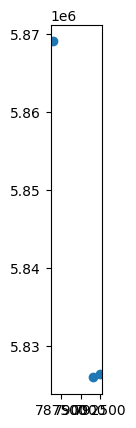

In [29]:
gdf.plot()

In [30]:
#buffer 400m
gdf["geometry_400"] = gdf.geometry.buffer(400)
gdf = gdf.set_geometry("geometry_400")

In [31]:
#intersection
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False) 

result = gpd.sjoin(gdf, gdf_vbb, predicate="intersects")

print(result)

    id                                                name shortname            strasse                      bezirk    plz       plz_ort       von       bis          oeffnungszeiten Mo Di Mi Do Fr Sa           So closed-exc hours-exc                                                                                                  w3 bemerkungen bemerkungen_en      lat      lng  ignore  immer-kostenlos  international  barrierefrei  action  short_distance     ort formatierteOeffnungszeit cleanedBemerkungen                        geometry                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [32]:
#group by name
result_grouped = (
    result.groupby("name")["Bauwerk Name"] 
    .agg(lambda x: ', '.join(x.unique())) #all results in one column
    .reset_index() 
)
result_grouped.head()

,name,Bauwerk Name
0,Kunsthandwerklicher ADVENT am Karl-August-Platz,"U Wilmersdorfer Str. (Berlin), U Deutsche Oper (Berlin)"
1,Kunsthandwerklicher ADVENT in der Leonhardtstrasse,S Charlottenburg Bhf (Berlin)


In [33]:
#add info from intersection to gdf

#merge
gdf = gdf.merge(result_grouped, on="name", how="left")

gdf = gdf.drop(columns=["geometry_400"])
gdf = gdf.set_geometry("geometry")

gdf.head()


,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen,geometry,Bauwerk Name
0,195,Kunsthandwerklicher ADVENT am Karl-August-Platz,None,Karl-August-Platz,Charlottenburg-Wilmersdorf,10625,10625 Berlin,01.12.24,01.12.24,11:00 Uhr bis 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://www.family-and-friends-ev.de/kunsthandwerklicher-advent-am-1-und-8-dezember-2024,NaN,None,52.5083,13.3101,0,0,0,0,0,0,Berlin,11:00-18:00,nan,POINT (792456.241 5826310.348),"U Wilmersdorfer Str. (Berlin), U Deutsche Oper (Berlin)"
1,198,Kunsthandwerklicher ADVENT in der Leonhardtstrasse,None,Leonhardtstraße,Charlottenburg-Wilmersdorf,14057,14057 Berlin,08.12.24,08.12.24,11:00 Uhr bis 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://www.family-and-friends-ev.de/8-dezember-kunsthandwerklicher-advent-in-der-leonhardtstrasse,NaN,None,52.5053,13.2970,0,0,0,0,0,0,Berlin,11:00-18:00,nan,POINT (791587.671 5825923.846),S Charlottenburg Bhf (Berlin)
2,192,Liebenberger Weihnachtsmarkt 2024 I Weihnachtszauber auf Schloss & Gut Liebenberg,None,Parkweg 1a (Löwenberger Land),Brandenburg,16775,NaN,30.11.24,22.12.24,Freitags: 17:00 Uhr bis 20:00 Uhr\nSamstags und Sonntags: 12:00 Uhr bis 19:00 Uhr,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,None,None,https://www.schloss-liebenberg.de/liebenberger-weihnachtsmarkt/,"Eintauchen in festlichen Lichterglanz vor einzigartiger, historischer Kulisse.",None,52.8950,13.2592,0,0,0,0,0,0,None,17:00-20:00,"eintauchen in festlichen lichterglanz vor einzigartiger, historischer kulisse",POINT (786457.652 5869088.516),NaN


In [34]:
#set short_distance = 1 when "Bauwerk Name" is not NA
gdf.loc[gdf["Bauwerk Name"].notna(), "short_distance"] = 1

gdf.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen,geometry,Bauwerk Name
0,195,Kunsthandwerklicher ADVENT am Karl-August-Platz,None,Karl-August-Platz,Charlottenburg-Wilmersdorf,10625,10625 Berlin,01.12.24,01.12.24,11:00 Uhr bis 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://www.family-and-friends-ev.de/kunsthandwerklicher-advent-am-1-und-8-dezember-2024,NaN,None,52.5083,13.3101,0,0,0,0,0,1,Berlin,11:00-18:00,nan,POINT (792456.241 5826310.348),"U Wilmersdorfer Str. (Berlin), U Deutsche Oper (Berlin)"
1,198,Kunsthandwerklicher ADVENT in der Leonhardtstrasse,None,Leonhardtstraße,Charlottenburg-Wilmersdorf,14057,14057 Berlin,08.12.24,08.12.24,11:00 Uhr bis 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://www.family-and-friends-ev.de/8-dezember-kunsthandwerklicher-advent-in-der-leonhardtstrasse,NaN,None,52.5053,13.2970,0,0,0,0,0,1,Berlin,11:00-18:00,nan,POINT (791587.671 5825923.846),S Charlottenburg Bhf (Berlin)
2,192,Liebenberger Weihnachtsmarkt 2024 I Weihnachtszauber auf Schloss & Gut Liebenberg,None,Parkweg 1a (Löwenberger Land),Brandenburg,16775,NaN,30.11.24,22.12.24,Freitags: 17:00 Uhr bis 20:00 Uhr\nSamstags und Sonntags: 12:00 Uhr bis 19:00 Uhr,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,None,None,https://www.schloss-liebenberg.de/liebenberger-weihnachtsmarkt/,"Eintauchen in festlichen Lichterglanz vor einzigartiger, historischer Kulisse.",None,52.8950,13.2592,0,0,0,0,0,0,None,17:00-20:00,"eintauchen in festlichen lichterglanz vor einzigartiger, historischer kulisse",POINT (786457.652 5869088.516),NaN


In [35]:
#rename column "Bauwerk Name" in "train"
gdf.rename(columns={"Bauwerk Name": "train"}, inplace = True)

gdf.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen,geometry,train
0,195,Kunsthandwerklicher ADVENT am Karl-August-Platz,None,Karl-August-Platz,Charlottenburg-Wilmersdorf,10625,10625 Berlin,01.12.24,01.12.24,11:00 Uhr bis 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://www.family-and-friends-ev.de/kunsthandwerklicher-advent-am-1-und-8-dezember-2024,NaN,None,52.5083,13.3101,0,0,0,0,0,1,Berlin,11:00-18:00,nan,POINT (792456.241 5826310.348),"U Wilmersdorfer Str. (Berlin), U Deutsche Oper (Berlin)"
1,198,Kunsthandwerklicher ADVENT in der Leonhardtstrasse,None,Leonhardtstraße,Charlottenburg-Wilmersdorf,14057,14057 Berlin,08.12.24,08.12.24,11:00 Uhr bis 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://www.family-and-friends-ev.de/8-dezember-kunsthandwerklicher-advent-in-der-leonhardtstrasse,NaN,None,52.5053,13.2970,0,0,0,0,0,1,Berlin,11:00-18:00,nan,POINT (791587.671 5825923.846),S Charlottenburg Bhf (Berlin)
2,192,Liebenberger Weihnachtsmarkt 2024 I Weihnachtszauber auf Schloss & Gut Liebenberg,None,Parkweg 1a (Löwenberger Land),Brandenburg,16775,NaN,30.11.24,22.12.24,Freitags: 17:00 Uhr bis 20:00 Uhr\nSamstags und Sonntags: 12:00 Uhr bis 19:00 Uhr,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,None,None,https://www.schloss-liebenberg.de/liebenberger-weihnachtsmarkt/,"Eintauchen in festlichen Lichterglanz vor einzigartiger, historischer Kulisse.",None,52.8950,13.2592,0,0,0,0,0,0,None,17:00-20:00,"eintauchen in festlichen lichterglanz vor einzigartiger, historischer kulisse",POINT (786457.652 5869088.516),NaN


In [36]:
#drop irrelevant columns
gdf.drop(columns=["plz", "ort", "formatierteOeffnungszeit", "cleanedBemerkungen", "geometry"], inplace = True)

gdf.head()


,id,name,shortname,strasse,bezirk,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,train
0,195,Kunsthandwerklicher ADVENT am Karl-August-Platz,None,Karl-August-Platz,Charlottenburg-Wilmersdorf,10625 Berlin,01.12.24,01.12.24,11:00 Uhr bis 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://www.family-and-friends-ev.de/kunsthandwerklicher-advent-am-1-und-8-dezember-2024,NaN,None,52.5083,13.3101,0,0,0,0,0,1,"U Wilmersdorfer Str. (Berlin), U Deutsche Oper (Berlin)"
1,198,Kunsthandwerklicher ADVENT in der Leonhardtstrasse,None,Leonhardtstraße,Charlottenburg-Wilmersdorf,14057 Berlin,08.12.24,08.12.24,11:00 Uhr bis 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://www.family-and-friends-ev.de/8-dezember-kunsthandwerklicher-advent-in-der-leonhardtstrasse,NaN,None,52.5053,13.2970,0,0,0,0,0,1,S Charlottenburg Bhf (Berlin)
2,192,Liebenberger Weihnachtsmarkt 2024 I Weihnachtszauber auf Schloss & Gut Liebenberg,None,Parkweg 1a (Löwenberger Land),Brandenburg,NaN,30.11.24,22.12.24,Freitags: 17:00 Uhr bis 20:00 Uhr\nSamstags und Sonntags: 12:00 Uhr bis 19:00 Uhr,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,17:00-20:00,None,None,https://www.schloss-liebenberg.de/liebenberger-weihnachtsmarkt/,"Eintauchen in festlichen Lichterglanz vor einzigartiger, historischer Kulisse.",None,52.8950,13.2592,0,0,0,0,0,0,NaN


In [37]:
#date types
gdf.dtypes

id                   int64
name                object
shortname           object
strasse             object
bezirk              object
plz_ort             object
von                 object
bis                 object
oeffnungszeiten     object
Mo                  object
Di                  object
Mi                  object
Do                  object
Fr                  object
Sa                  object
So                  object
closed-exc          object
hours-exc           object
w3                  object
bemerkungen         object
bemerkungen_en      object
lat                float64
lng                float64
ignore               int64
immer-kostenlos      int64
international        int64
barrierefrei         int64
action               int64
short_distance       int64
train               object
dtype: object

In [40]:
#adjust date types
gdf[["id", "name", "shortname", "strasse", "bezirk", "plz_ort", "train", "von", "bis", "oeffnungszeiten", 
     "Mo", "Di", "Mi", "Do", "Fr", "Sa", "So", "closed-exc", "hours-exc", "w3", "bemerkungen", "bemerkungen_en", "ignore", "immer-kostenlos", 
     "international", "barrierefrei", "action", "short_distance"]] = gdf[["id", "name", "shortname", "strasse", "bezirk", "plz_ort", "train", "von", "bis", "oeffnungszeiten", 
     "Mo", "Di", "Mi", "Do", "Fr", "Sa", "So", "closed-exc", "hours-exc", "w3", "bemerkungen", "bemerkungen_en", "ignore", "immer-kostenlos", 
     "international", "barrierefrei", "action", "short_distance"]].astype("string")

gdf.dtypes

id                 string[python]
name               string[python]
shortname          string[python]
strasse            string[python]
bezirk             string[python]
plz_ort            string[python]
von                string[python]
bis                string[python]
oeffnungszeiten    string[python]
Mo                 string[python]
Di                 string[python]
Mi                 string[python]
Do                 string[python]
Fr                 string[python]
Sa                 string[python]
So                 string[python]
closed-exc         string[python]
hours-exc          string[python]
w3                 string[python]
bemerkungen        string[python]
bemerkungen_en     string[python]
lat                       float64
lng                       float64
ignore             string[python]
immer-kostenlos    string[python]
international      string[python]
barrierefrei       string[python]
action             string[python]
short_distance     string[python]
train         

In [44]:
#add columns image and urheberschaft

gdf["image"] = None
gdf["urheberschaft"] = None


# images = pd.read_excel("Weihnachtsmarkt_Bilder.xlsx")
# images["id"] = images["id"].astype("string")
# images.drop(columns=["name"], inplace=True) 

# weihnachten = gdf.merge(images, on="id", how="left")

# weihnachten.head()


In [ ]:
#case: missing images
condition = gdf["image"].isna()

gdf.loc[condition, "image"] = "placeholder.png"
gdf.loc[condition, "urheberschaft"] = "freestocks.org, CC BY-SA 4.0 via Wikimedia Commons"

len(gdf)

3

In [46]:
#csv
gdf.to_csv("new_data.csv", index= False)